In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data_sentiment.csv')
df_0 = df[df.sentiment == 0]
df_1 = df[df.sentiment == 1]
df_2 = df[df.sentiment == 2]

In [5]:
import matplotlib.pyplot as plt

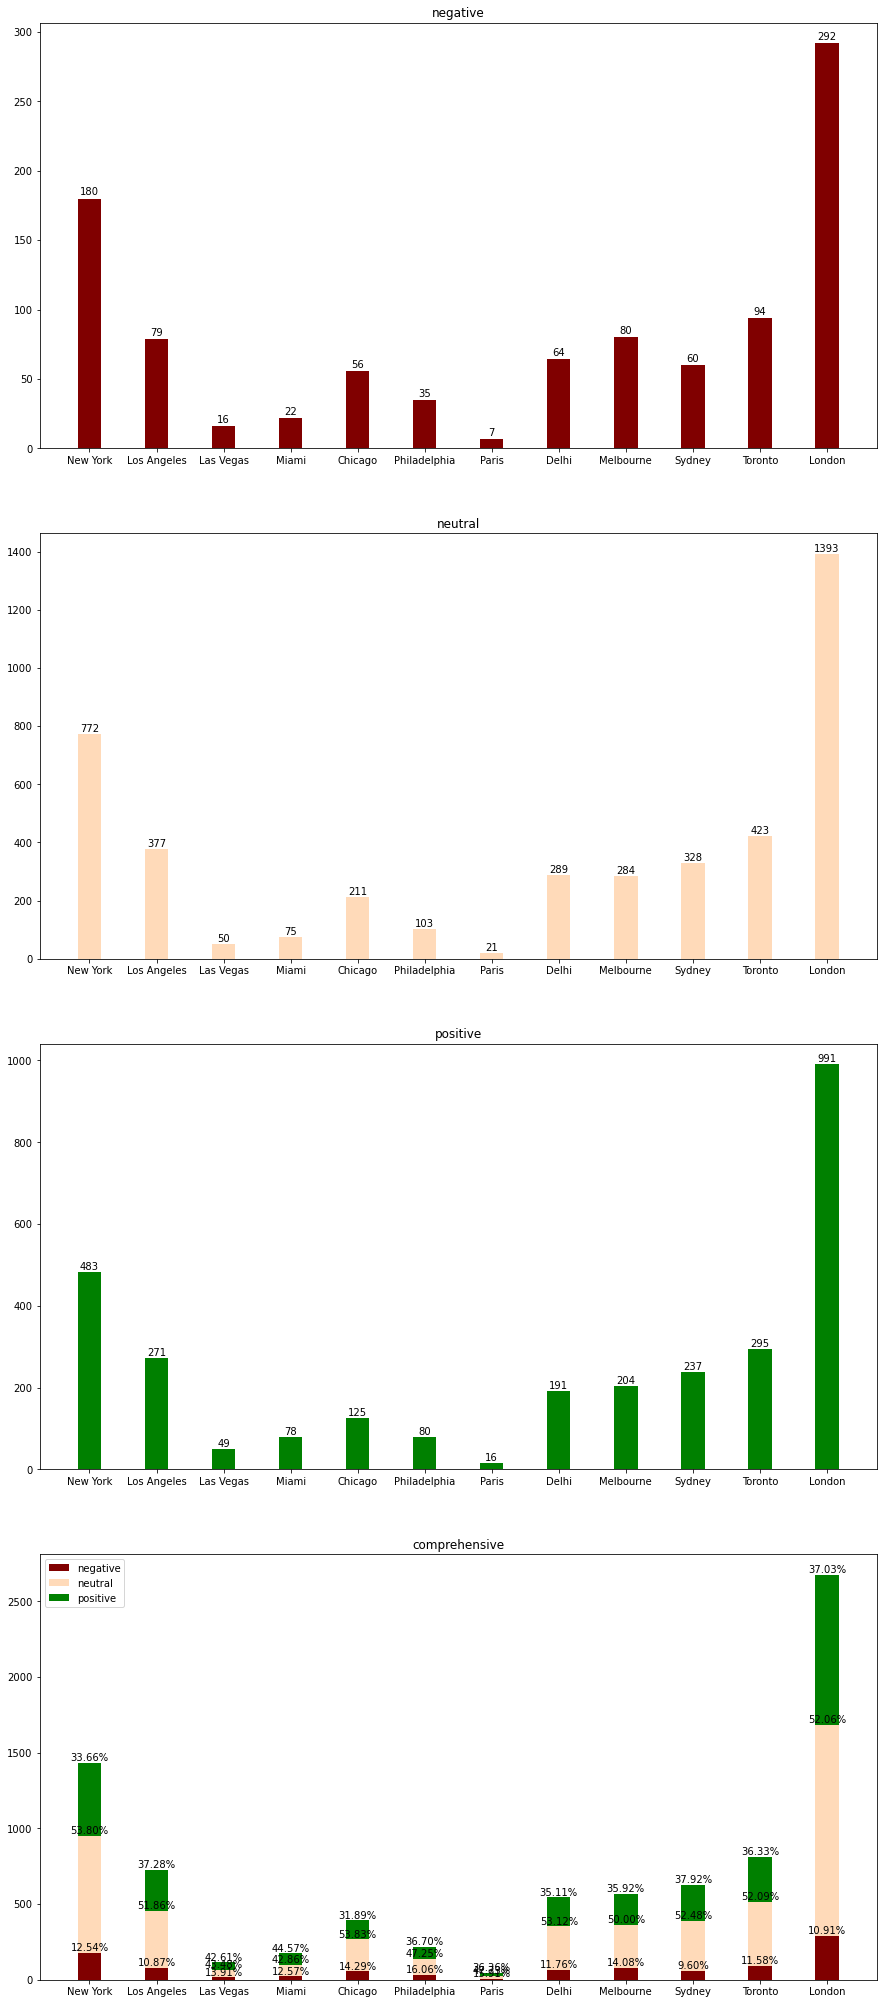

In [28]:
city_d0 = dict()
city_d1 = dict()
city_d2 = dict()
for c in df_0.location.unique():
    city_d0[c] = df_0[df_0.location ==c]
    city_d1[c] = df_1[df_1.location ==c]
    city_d2[c] = df_2[df_2.location ==c]
    
ind = np.arange(len(city_d0.keys()))
fig, ax = plt.subplots(4,1,figsize=(15,36))
width = 0.35

count0 = []
count1 = []
count2 = []

for v in city_d0.values():
    count0.append(len(v))

for v in city_d1.values():
    count1.append(len(v))

for v in city_d2.values():
    count2.append(len(v))

ax[0].bar(ind, count0, width = width, label = 'negative', color = 'maroon')
ax[1].bar(ind, count1, width = width, label = 'neutral', color = 'peachpuff')
ax[2].bar(ind, count2, width = width, label = 'positive', color = 'green')

ax[3].bar(ind, count0, width = width, label = 'negative', color = 'maroon')
ax[3].bar(ind, count1, width = width, bottom=count0, label = 'neutral', color = 'peachpuff')
s = [a+b for a, b in zip(count0, count1)]
ax[3].bar(ind, count2, width = width, bottom=s, label = 'positive', color = 'green')
s = [a+b+c for a, b, c in zip(count0, count1, count2)]

for a in ax:
    a.set_xticks(ind)
    a.set_xticklabels(list(city_d0.keys()))

for i, j, k, l in zip(ind, count0, count1, count2):
    ax[0].text(i, j+1, j, ha='center', va='bottom')
    ax[1].text(i, k+1, k, ha='center', va='bottom')
    ax[2].text(i, l+1, l, ha='center', va='bottom')
    ax[3].text(i, j+1, f"{j/(j+k+l)*100:.2f}%", ha='center', va='bottom')
    ax[3].text(i, j+k+1, f"{k/(j+k+l)*100:.2f}%", ha='center', va='bottom')
    ax[3].text(i, j+k+l+1, f"{l/(j+k+l)*100:.2f}%", ha='center', va='bottom')
ax[0].set_title('negative')
ax[1].set_title('neutral')
ax[2].set_title('positive')
ax[3].set_title('comprehensive')


plt.legend()
plt.show()

In [7]:
d = ['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04']

city_ds = [city_d0, city_d1, city_d2]
city_times = []
for city_d in city_ds:
    city_time = dict()
    
    for k,v in city_d.items():
        city_time[k] = []
        for time in d:
            count = len(v[v['date'].str.contains(time)])
            city_time[k].append(count) 
    city_times.append(city_time)

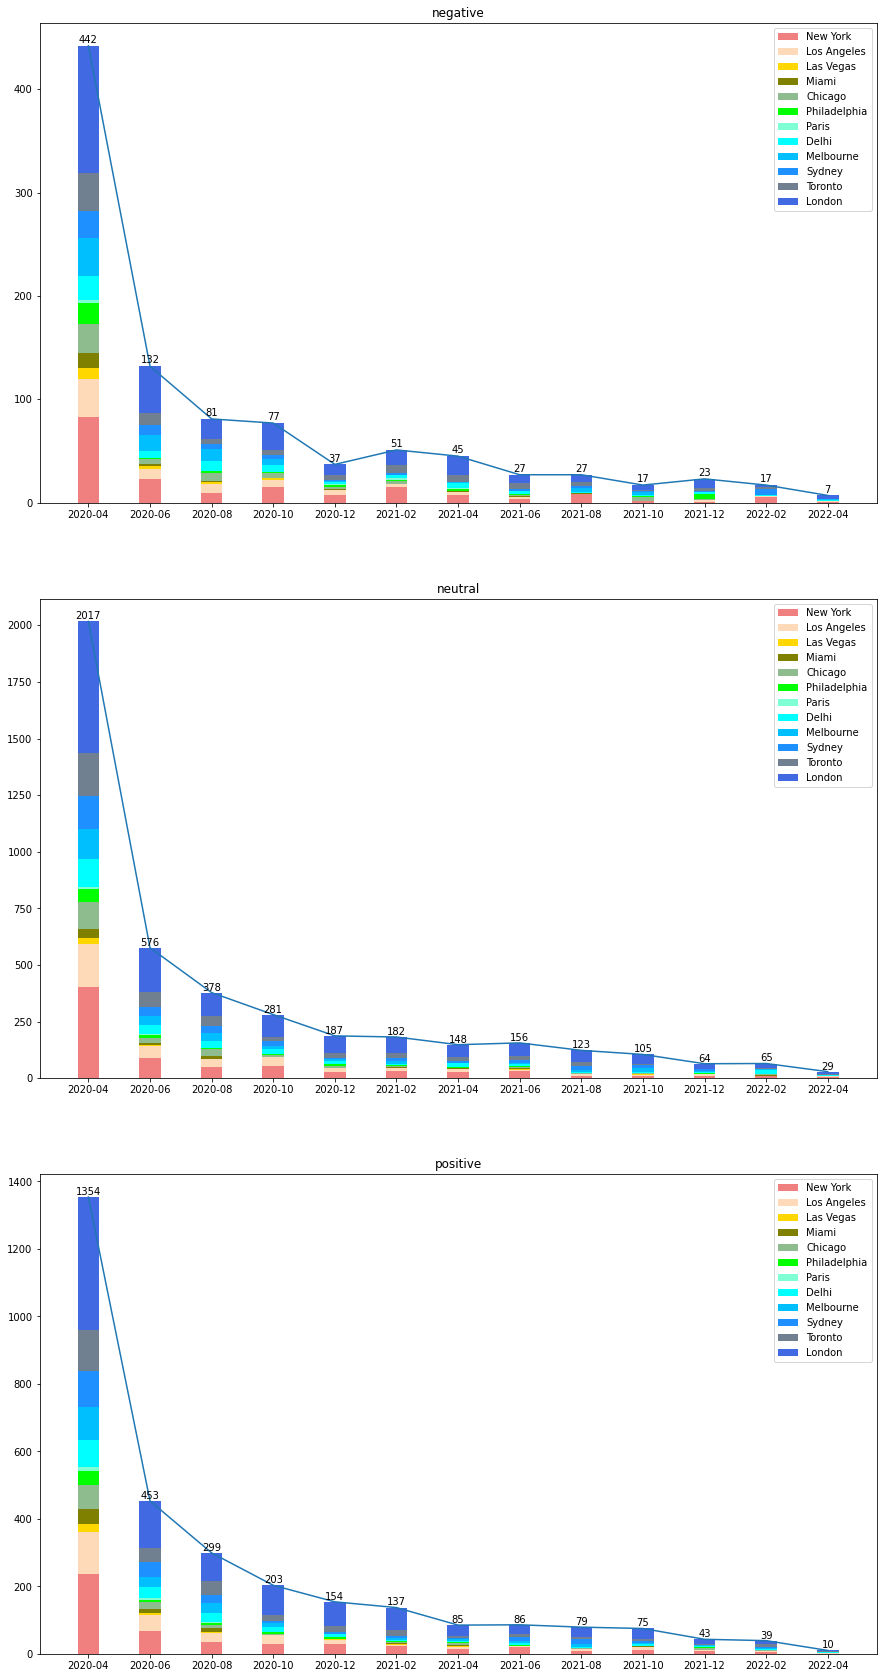

In [29]:
ind = np.arange(27//2)  # the x locations for the groups
width = 0.35
fig, axs = plt.subplots(3, 1, figsize=(15, 27))

c = ['lightcoral', 'peachpuff', 'gold', 'olive', 'darkseagreen',
     'lime', 'aquamarine', 'cyan', 'deepskyblue', 'dodgerblue',
     'slategray', 'royalblue', 'mediumpurple', 'plum', 'hotpink',
     'crimson', 'silver', 'darkred', 'maroon', 'sandybrown', 'wheat',
     'honeydew', 'limegreen', 'steelblue']

title_d = {0:'negative', 1:'neutral', 2:'positive'}
for n in range(3):
    c_iter = iter(c)
    #fig = figs[n]
    ax = axs[n]
    city_time = city_times[n]
    
    k = np.array(list(city_time.keys()))
    v = np.array(list(city_time.values()))
    s = [0]*27
    v_tmp = []
    for i in range(len(v)):
        tmp = []
        v1 = v[i]
        for j in range(1,len(v1),2):
            tmp.append(v1[j]+v1[j+1])
        v_tmp.append(tmp)
        
    for i in range(len(k)):
        if i == 0:
            ax.bar(ind, v_tmp[i], width, color=c[i], label=k[i])
            s = [a+b for a, b in zip(v_tmp[i], s)]
        else:
            ax.bar(ind, v_tmp[i], width, color=c[i], bottom=s, label=k[i])
            s = [a+b for a, b in zip(v_tmp[i], s)]

    ax.plot(ind, s)

    ax.set_xticks(ind)
    tmp = []
    for i in range(0, len(k), 2):
        tmp.append(d[i]+"~"+d[i+1])
    ax.set_xticklabels(d[2::2])

    for i, j in zip(ind, s):
        ax.text(i, j+1, j, ha='center', va='bottom')
    ax.legend()
    ax.set_title(title_d[n])
plt.show()

In [21]:
global_times = []
for city_time in city_times:
    global_time = []
    for _,v in city_time.items():
        if global_time == []:
            global_time = v.copy()
        else:
            global_time = [a+b for a,b in zip(global_time,v)]
    global_times.append(global_time)

In [ ]:
global_times_2 = []
for v in global_times:
    v_tmp = []

    for j in range(1, len(v), 2):
        v_tmp.append(v[j]+v[j+1])

    global_times_2.append(v_tmp)
global_times = global_times_2


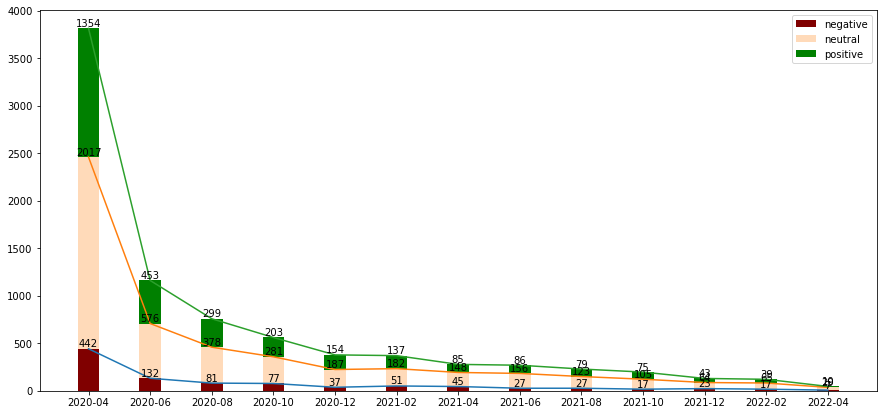

In [40]:
ind = np.arange(27//2)  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

s = [0]*(27//2)

ax.bar(ind, global_times[0], width=width, label='negative', color='maroon')
ax.plot(ind, global_times[0])
ax.bar(ind, global_times[1], width=width, bottom=global_times[0], label='neutral', color='peachpuff')
s = [a+b for a, b in zip(global_times[0], global_times[1])]
ax.plot(ind, s)
ax.bar(ind, global_times[2], width=width, bottom=s, label='positive', color='green')
s = [a+b+c for a, b, c in zip(global_times[0], global_times[1], global_times[2])]
ax.plot(ind, s)

for i, j, k, l in zip(ind, global_times[0], global_times[1], global_times[2]):
    ax.text(i, j+1, f"{j}", ha='center', va='bottom')
    ax.text(i, j+k+1, f"{k}", ha='center', va='bottom')
    ax.text(i, j+k+l+1, f"{l}", ha='center', va='bottom')
    
ax.set_xticks(ind)
# tmp = []
# for i in range(0, len(k), 2):
#     tmp.append(d[i]+"~"+d[i+1])
ax.set_xticklabels(d[2::2])

plt.legend()
plt.show()

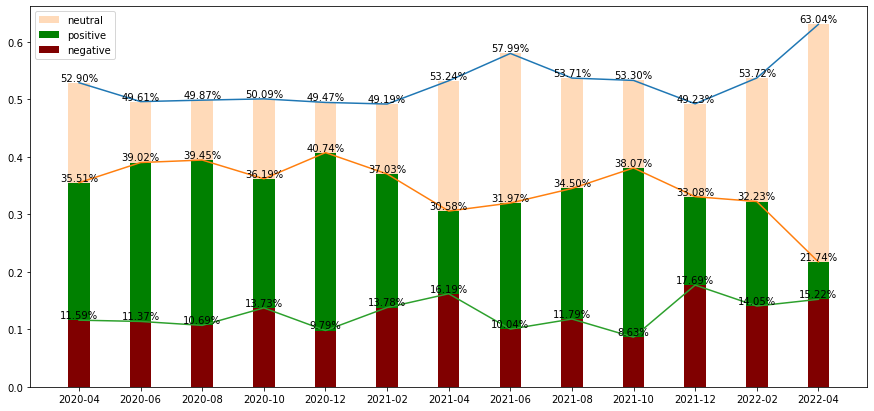

In [50]:
ind = np.arange(27//2)  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

global_ratios = []
for g in global_times:
    ratio = []
    for i,j in zip (g, s):
        ratio.append(i/j)
    global_ratios.append(ratio)

s1 = [0]*(27//2)

ax.bar(ind, global_ratios[1], width=width,
      label='neutral', color='peachpuff')
s1 = [a+b for a, b in zip(s1, global_ratios[1])]
ax.plot(ind, global_ratios[1])

ax.bar(ind, global_ratios[2], width=width,
       label='positive', color='green')
s1 = [a+b for a, b in zip(s1, global_ratios[2])]
ax.plot(ind, global_ratios[2])


ax.bar(ind, global_ratios[0], width=width, label='negative', color='maroon')
s1 = [a+b for a, b in zip(s1, global_ratios[0])]
ax.plot(ind, global_ratios[0])

for i, j, k, l in zip(ind, global_ratios[0], global_ratios[1], global_ratios[2]):
    ax.text(i, j, f"{j*100:.2f}%", ha='center', va='bottom')
    ax.text(i, k, f"{k*100:.2f}%", ha='center', va='bottom')
    ax.text(i, l, f"{l*100:.2f}%", ha='center', va='bottom')

ax.set_xticks(ind)
# tmp = []
# for i in range(0, len(k), 2):
#     tmp.append(d[i]+"~"+d[i+1])
ax.set_xticklabels(d[2::2])

plt.legend()
plt.show()


In [36]:
len(global_times[2])

13

In [31]:
len(global_ratios[0])

12

In [34]:
len(s)

12

In [37]:
s = [a+b+c for a, b, c in zip(global_times[0], global_times[1], global_times[2])]
len(s)

13

In [43]:
global_ratios


[[0.11591922370836612,
  0.11369509043927649,
  0.10686015831134564,
  0.13725490196078433,
  0.09788359788359788,
  0.13783783783783785,
  0.1618705035971223,
  0.10037174721189591,
  0.11790393013100436,
  0.08629441624365482,
  0.17692307692307693,
  0.14049586776859505,
  0.15217391304347827],
 [0.5289798059270915,
  0.49612403100775193,
  0.49868073878627966,
  0.5008912655971479,
  0.4947089947089947,
  0.4918918918918919,
  0.5323741007194245,
  0.5799256505576208,
  0.537117903930131,
  0.5329949238578681,
  0.49230769230769234,
  0.5371900826446281,
  0.6304347826086957],
 [0.35510097036454236,
  0.39018087855297157,
  0.3944591029023747,
  0.36185383244206776,
  0.4074074074074074,
  0.37027027027027026,
  0.3057553956834532,
  0.31970260223048325,
  0.34497816593886466,
  0.38071065989847713,
  0.33076923076923076,
  0.32231404958677684,
  0.21739130434782608]]